In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [15]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [16]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,0
3,3.jpg,0
4,4.jpg,1


## Load Images

In [17]:
# from matplotlib.pyplot import imread
from scipy.ndimage import imread

def load_images(filenames, default_path):
    images = []

    for filename in filenames:
        filepath = default_path + filename

        image = imread(filepath)
        images.append(image)

    images = np.array(images)

    return images

In [18]:
X_train = load_images(train["filename"], "data/train/")
X_train.shape

(2000,)

In [19]:
X_test = load_images(test["filename"], "data/test/")
X_test.shape

(2000,)

In [20]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0])

In [21]:
y_test = test["target"].values

print(y_test.shape)
y_test[0:10]

(2000,)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

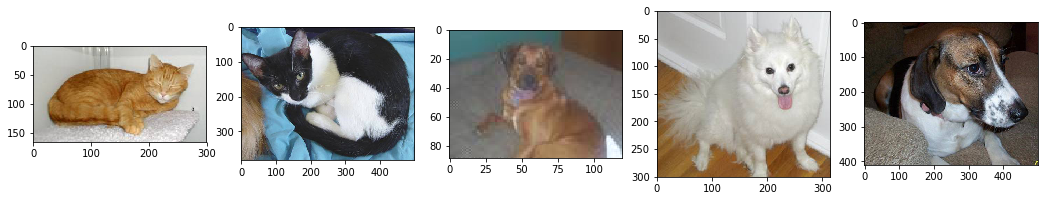

In [22]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train[0])
axes[1].imshow(X_train[1])
axes[2].imshow(X_train[2])
axes[3].imshow(X_train[3])
axes[4].imshow(X_train[4])

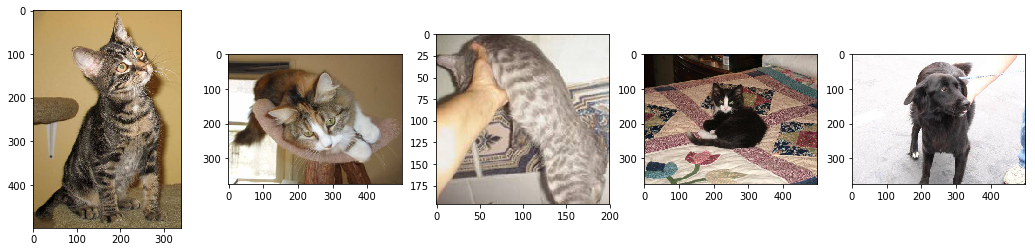

In [23]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test[0])
axes[1].imshow(X_test[1])
axes[2].imshow(X_test[2])
axes[3].imshow(X_test[3])
axes[4].imshow(X_test[4])

## Preprocessing

### Resize Images

In [29]:
from tqdm import tqdm
from scipy.misc import imresize

def resize_image(original_images, size):
    resized_images = []
    
    for original_image in tqdm(original_images):
        resized_image = imresize(original_image, size)
        resized_images.append(resized_image)
        
    resized_images = np.array(resized_images)
    
    return resized_images

In [30]:
X_train_224 = resize_image(X_train, (224, 224))
X_train_224.shape

100%|██████████| 2000/2000 [00:02<00:00, 739.97it/s]


(2000, 224, 224, 3)

In [31]:
X_test_224 = resize_image(X_test, (224, 224))
X_test_224.shape

100%|██████████| 2000/2000 [00:02<00:00, 737.83it/s]


(2000, 224, 224, 3)

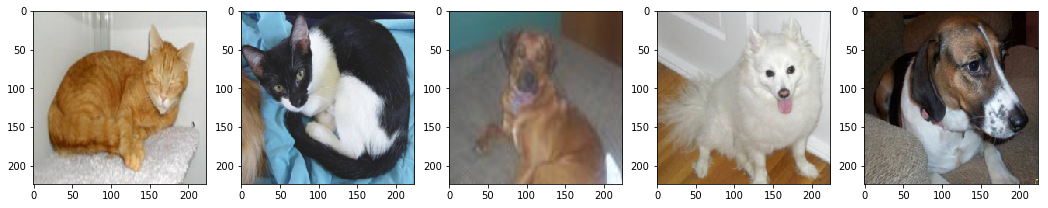

In [32]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_train_224[0])
axes[1].imshow(X_train_224[1])
axes[2].imshow(X_train_224[2])
axes[3].imshow(X_train_224[3])
axes[4].imshow(X_train_224[4])

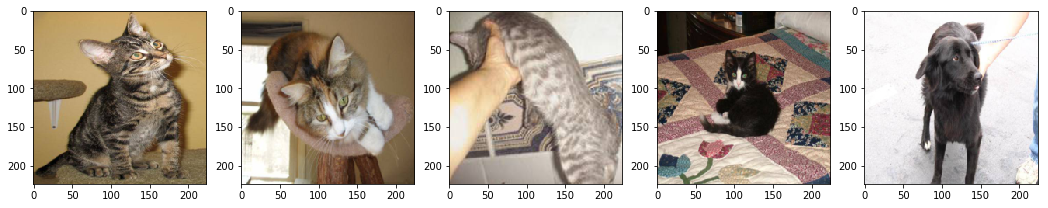

In [33]:
figure, axes = plt.subplots(nrows=1, ncols=5)
figure.set_size_inches(18, 4)

axes[0].imshow(X_test_224[0])
axes[1].imshow(X_test_224[1])
axes[2].imshow(X_test_224[2])
axes[3].imshow(X_test_224[3])
axes[4].imshow(X_test_224[4])

## Build a Model

### Tiny CNN Model

In [34]:
# Write your code here!

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters = 16,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform',
                 input_shape = (224, 224, 3)))

model.add(Conv2D(filters = 16,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform'))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform'))

model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 kernel_initializer = 'he_uniform'))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128,
                activation = 'relu',
                kernel_initializer = 'he_uniform'))

model.add(Dense(units = 1,
                activation = 'sigmoid',
                kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 100352)            0         
__________

In [36]:
from keras.optimizers import SGD

optimizer = SGD(lr=0.000001)

model.compile(optimizer = optimizer,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [37]:
model.fit(X_train_224, y_train, epochs=1)

Epoch 1/1
2000/2000 [==============================] - 131s 65ms/step - loss: 7.8722 - acc: 0.5005


### VGG-16 w/ Pre-trained Model

In [ ]:
!pip install h5py

In [42]:
# Write your code here!

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False,
                 input_shape = (224, 224, 3)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 256,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(Conv2D(filters = 512,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same',
                 trainable = False))

model.add(MaxPool2D(pool_size = (2, 2),
                    strides = (2, 2)))

model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')


model.add(Flatten())

model.add(Dense(units = 128,
                activation = 'relu',
                kernel_initializer = 'he_uniform'))

model.add(Dense(units = 1,
                activation = 'sigmoid',
                kernel_initializer = 'glorot_uniform'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [43]:
from keras.optimizers import SGD

optimizer = SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer = optimizer,
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train_224, y_train, epochs = 1)

Epoch 1/1
 736/2000 [==========>...................] - ETA: 6:15 - loss: 1.7176 - acc: 0.8220